170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.2663 - loss: 2.0260 - val_accuracy: 0.3576 - val_loss: 1.7794
Epoch 2/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3846 - loss: 1.7087 - val_accuracy: 0.4050 - val_loss: 1.6589
Epoch 3/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4237 - loss: 1.6116 - val_accuracy: 0.4324 - val_loss: 1.5804
Epoch 4/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4366 - loss: 1.5687 - val_accuracy: 0.4404 - val_loss: 1.5674
Epoch 5/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4620 - loss: 1.5023 - val_accuracy: 0.4550 - val_loss: 1.5113
Epoch 6/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4775 - loss: 1.4630 - val_accuracy: 0.4638 - val_loss: 1.5019
Epoch 7/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4910 - loss: 1.4191 - val_accuracy: 0.4776 - val_loss: 1.4812
Epoch 8/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4976 - loss: 1.4083 - val_accu

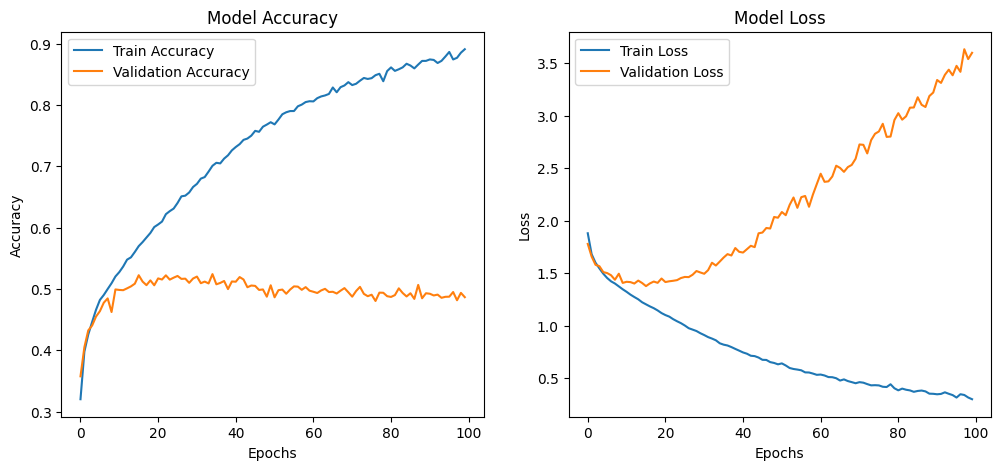

In [1]:
# Install TensorFlow if not already installed
# !pip install tensorflow --quiet

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import random

# Step 1: Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

# Step 2: Normalize the pixel values (0–255 → 0–1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Step 3: Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 4: Define class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Step 5: Build Feedforward Neural Network (FNN)
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),      # Flatten 3D image into 1D vector
    Dense(512, activation='relu'),         # Hidden layer 1
    Dense(256, activation='relu'),         # Hidden layer 2
    Dense(128, activation='relu'),         # Hidden layer 3
    Dense(10, activation='softmax')        # Output layer (10 classes)
])

# Step 6: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 7: Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=128,
                    validation_split=0.1, verbose=1)

# Step 8: Evaluate model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%")

# Step 9: Plot accuracy and loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


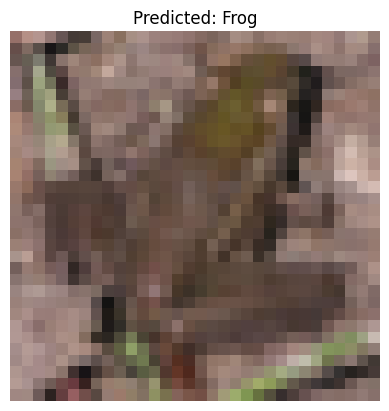

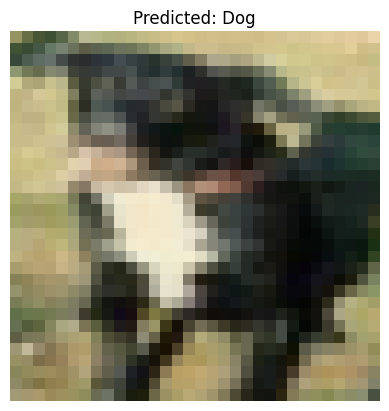

In [6]:
# Step 10: Make predictions
predictions = model.predict(x_test)

# Step 11: Display predictions for 10 random test images
random_indices = random.sample(range(len(x_test)), 2)
for idx in random_indices:
    plt.imshow(x_test[idx])
    plt.title(f"Predicted: {class_names[np.argmax(predictions[idx])]}")
    plt.axis('off')
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


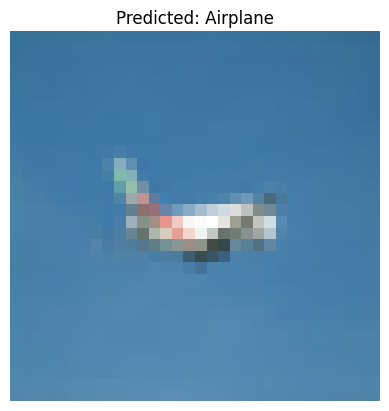

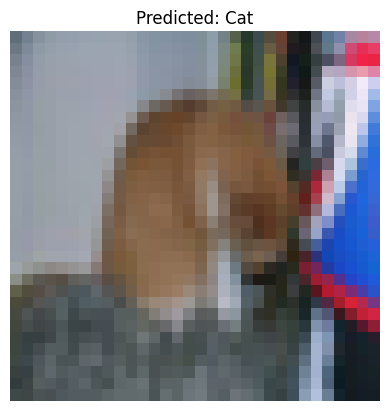

In [8]:
# Step 10: Make predictions
predictions = model.predict(x_test)

# Step 11: Display predictions for 10 random test images
random_indices = random.sample(range(len(x_test)), 2)
for idx in random_indices:
    plt.imshow(x_test[idx])
    plt.title(f"Predicted: {class_names[np.argmax(predictions[idx])]}")
    plt.axis('off')
    plt.show()